# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Answer
We are trying to analyize the features of the vehicles.csv dataset (including categorical and numerical) to determine which ones have the greatest influence on the price column. We will build various different machine learning models to predict price, and analyze these models to understand the importance they put on various features. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Answer
I will pull the vehicles.csv data into a dataframe and use .info(), .describe(), and simple printing of it to understand the data. This is done below in code. 

In [1]:
# Set up imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load DF
vehicles = pd.read_csv('data/vehicles.csv')

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
vehicles

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


#### Summary
I have found that there are a lot of NaN rows as well as a lot of non-numeric features. These will both need to be cleaned up in the next section. 

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [6]:
# Create a copy of the original dataframe in case we need to revert anything
vehicles_og = vehicles.copy()

# Drop NaNs 
vehicles = vehicles.dropna()

In [7]:
# Notice that region and state could be duplicative in meaning - examine unique values and counts
vehicles[['region', 'state']]
len(vehicles.region.unique())
len(vehicles.state.unique())

# I see there are 440 unique regions - this is likely too many for this analysis so I will drop that column in favor of state
vehicles = vehicles.drop(columns = 'region')

In [8]:
# Can drop the ID column as it is not informative
vehicles = vehicles.drop(columns = 'id')

In [9]:
# Examine the length of the unique columns of the other non-numerical columns to see how many categories they are
print("year unique: " + str(len(vehicles.year.unique())))
print("manufacturer unique: " + str(len(vehicles.manufacturer.unique())))
print("model unique: " + str(len(vehicles.model.unique())))
print("condition unique: " + str(len(vehicles.condition.unique())))
print("cylinders unique: " + str(len(vehicles.cylinders.unique())))
print("fuel unique: " + str(len(vehicles.fuel.unique())))
print("title_status unique: " + str(len(vehicles.title_status.unique())))
print("transmission unique: " + str(len(vehicles.transmission.unique())))
print("VIN unique: " + str(len(vehicles.VIN.unique())))
print("size unique: " + str(len(vehicles['size'].unique())))
print("paint_color unique: " + str(len(vehicles.paint_color.unique())))

year unique: 89
manufacturer unique: 41
model unique: 5139
condition unique: 6
cylinders unique: 8
fuel unique: 5
title_status unique: 6
transmission unique: 3
VIN unique: 21938
size unique: 4
paint_color unique: 12


In [10]:
# From the above, I see that both model and VIN have a lot of categories, so it will make the data huge. VIN is essentially an ID 
# we can also drop that. I will also drop manufacturer and model as the likelihood is that there will be different values in test and train data which 
# will cause an issue
vehicles = vehicles.drop(columns = ['VIN', 'model', 'manufacturer'])

In [11]:
# Examine final dataframe 
vehicles

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
126,0,2018.0,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al
127,0,2019.0,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al
128,0,2018.0,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al
215,4000,2002.0,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,2500,1995.0,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,12995,2016.0,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,32999,2014.0,excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,15999,2018.0,excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy
426833,6800,1997.0,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,wy


In [12]:
# Note that I will not do any feature transformation yet, as I will want this built into my model pipelines. However,
# the final step will be to pull out X and y test and train sets
X = vehicles.copy().drop(columns = 'price')
# log transform y
y = np.log1p(vehicles['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### First try to visualize the data

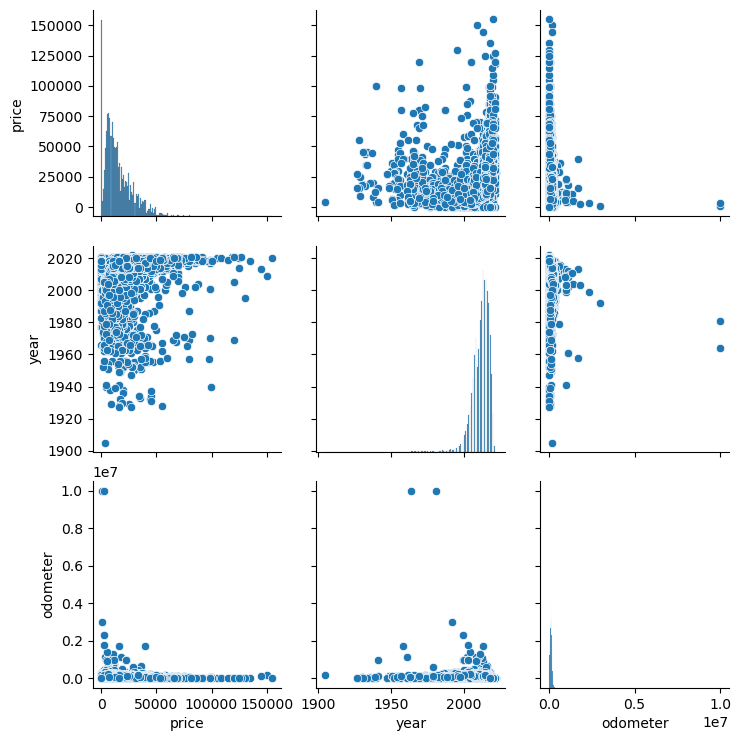

In [13]:
# Before I build any models, I'd like to see how the current numeric features are correlated to price, and I will do
# so by looking at the pairplots 
numeric_columns = vehicles.select_dtypes(include = ['int64', 'float64']).columns

sns.pairplot(vehicles[numeric_columns])

In [14]:
# I tried to do the same by exploring the pairplots of one hot encoded non_numeric_columns with less than 5 categories,
# but it really was not too helpful to visualize because of course one hot encoding turns one categorical feature into the
# number of features and simply 1's or 0's for the values so it doesn't tell us much meaningful.
short_non_numeric_columns = ['fuel', 'transmission', 'size']

col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), short_non_numeric_columns), 
                                          remainder='passthrough')
df = pd.DataFrame(col_transformer.fit_transform(vehicles), columns = col_transformer.get_feature_names_out())

# Commenting this to save run time, uncomment to see pairplots but note it's not helpful as described above
# sns.pairplot(df)

#### Moving on to building models
Now that I have my visualizations out of the way, I can see why it will be so important to build a few models and use the results of that to determine feature importance, because really the visualizations did not tell us much.

For each of the 4 models below, I will train on the training data and then calculate the mean squared error on the test data. I will choose the best model as the one that minimizes mean squared error on the test data, as is an industry best practice.

In [15]:
# Model #1: Simple Linear Regression
non_numeric_columns = vehicles.select_dtypes(include = 'object').columns
pipe1 = Pipeline([
    ('transform', make_column_transformer((OneHotEncoder(drop = 'if_binary'), non_numeric_columns), remainder = 'passthrough')),
    ('linreg', LinearRegression())])

pipe1.fit(X_train, y_train)
mse1 = mean_squared_error(pipe1.predict(X_test), y_test)
print("The MSE of the simple linear regression is : " + str(mse1))

The MSE of the simple linear regression is : 7.284456480766284


In [16]:
# Model #2: Linear Regression with Polynomial Features
numeric_columns = X_train.select_dtypes(include = ['int64', 'float64']).columns
pipe2 = Pipeline([
    ('poly_ohe_transform', make_column_transformer(
        (PolynomialFeatures(degree = 3), numeric_columns),
        (OneHotEncoder(drop = 'if_binary'), non_numeric_columns), remainder = 'passthrough')),
    ('linreg', LinearRegression())])

pipe2.fit(X_train, y_train)
mse2 = mean_squared_error(pipe2.predict(X_test), y_test)
print("The MSE of the simple linear regression is : " + str(mse2))


The MSE of the simple linear regression is : 7.816178804513754


In [17]:
# Model #3: Ridge Model

param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

# Create a pipeline to transform features, scale them, and make a ride model

pipe3 = Pipeline([
    ('transform', make_column_transformer((OneHotEncoder(drop = 'if_binary'), non_numeric_columns), remainder = 'passthrough')),
    ('scale', StandardScaler(with_mean = False)),
    ('ridge', Ridge())])

grid = GridSearchCV(pipe3, param_grid = param_dict)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

mse3 = mean_squared_error(best_model.predict(X_test), y_test)
print("The MSE of the Ridge model, using Grid search to select best alpha is : " + str(mse3))

The MSE of the Ridge model, using Grid search to select best alpha is : 6.016071904942131


In [18]:
# Model #4: Using Sequential feature selector and then modeling
pipe4 = Pipeline([
    ('transform', make_column_transformer((PolynomialFeatures(degree = 3, include_bias = False), numeric_columns))),
                                          # (OneHotEncoder(drop = 'if_binary'), non_numeric_columns), 
                                          # remainder = 'passthrough')),
    ('scaler', StandardScaler(with_mean = False)),
    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select = 6)),
    ('linreg', LinearRegression())])

pipe4.fit(X_train, y_train)
mse4 = mean_squared_error(pipe4.predict(X_test), y_test)
print("The MSE using Sequential Feature Selection and Linear Regression is : " + str(mse4))

The MSE using Sequential Feature Selection and Linear Regression is : 7.817069226907351


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Overview
As can be seen above, the model that minimizes MSE on the test data is Ridge model with alpha selected via Grid Search. Conveniently, this was already named "best_model" above, so I will continue to use that variable as we explore the features.

In [19]:
# As I know from lecture, coefficients of a Ridge model are not meaningful because they depend heavily on the value of alpha
# Therefore, let's examine the feature permutation. 

transformed_columns = best_model.named_steps['transform'].get_feature_names_out()

r = permutation_importance(best_model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    print(f"{transformed_columns[i]:<8}\t"
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")


onehotencoder__cylinders_6 cylinders	0.215 +/- 0.004
onehotencoder__cylinders_10 cylinders	0.077 +/- 0.003
onehotencoder__cylinders_3 cylinders	0.045 +/- 0.002
onehotencoder__condition_good	0.020 +/- 0.001
onehotencoder__cylinders_4 cylinders	0.016 +/- 0.002
onehotencoder__condition_fair	0.014 +/- 0.001
onehotencoder__condition_like new	0.010 +/- 0.001
onehotencoder__condition_salvage	0.003 +/- 0.001
onehotencoder__cylinders_5 cylinders	0.002 +/- 0.001
onehotencoder__condition_excellent	0.002 +/- 0.000
onehotencoder__cylinders_12 cylinders	0.001 +/- 0.000
onehotencoder__condition_new	0.000 +/- 0.000


In [20]:
# From what we saw above, cylinders and condition are the top most influential features. As a final test,
# let's build a final model using just these 2 columns and see how it does. 

param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

# Create a pipeline to transform features, scale them, and make a ridge model

pipe_final = Pipeline([
    ('transform', make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['condition', 'cylinders']))),
    ('scale', StandardScaler(with_mean = False)),
    ('ridge', Ridge())])

grid_final = GridSearchCV(pipe_final, param_grid = param_dict)

grid_final.fit(X_train, y_train)

best_model_final = grid_final.best_estimator_

mse_final = mean_squared_error(best_model_final.predict(X_test), y_test)
print("The MSE of the final model is : " + str(mse_final))

The MSE of the final model is : 7.545122587121861


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Summary
Based on what we have seen above, the two most important features in determining the price of a used car are the condition and the cylinders. This is based on the feature importance of the best model (as chosed by minimizing mean squared error). This was further validated by building a model off of only those two features and finding the the MSE did not increase much from limiting to just these factors, and in fact performed better than some of the other models we built on all features. 

My recommendation is to source cars that are in good condition. As I do not know much about how cars are made, I would recommend using your industry knowledge to determine which number of cylinders is most appealing. If you are not sure, we can consider doing further analysis to try to understand which ones are most impactful. 

Note, that we could also consider re-cleaning the model to replace the cylinders column directly with integers representing the number of cyclinders, instead of the one hot encoding version. I would recommend this in future if another analysis were to be done. 